<a href="https://colab.research.google.com/github/KeiandraK/DS-Unit-1-Sprint-2-Statistics/blob/master/Keiandra_King_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

political_data_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [0]:
poll_abs_data= pd.read_csv(political_data_url)

In [0]:
column_headers= ['Party','Handicapped-infants','Water-project-cost-sharing','Adoption-of-the-budget-resolution', 
                 'Physician-fee-freeze', 'El-Salvador-aid','Religious-groups-in-schools',
                 'Anti-satellite-test-ban','Aid-to-nicaraguan-contras','MX-missile','Immigration','Synfuels-corporation-cutback',
                 'Education-spending','Superfund-right-to-sue','Crime','Duty-free-exports','Export-administration-act-south-africa']
poll_abs_data=pd.read_csv(political_data_url, header=None, names=column_headers)
print(poll_abs_data.shape)
poll_abs_data.head()

(435, 17)


,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
np.NaN
poll_abs_data=poll_abs_data.replace("?", np.NaN)
poll_abs_data.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
poll_abs_data=poll_abs_data.replace({'n':0, 'y':1},)
poll_abs_data.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
mu = 0 
sigma = 0.01 
sample = np.random.normal(mu, sigma, 1000)
abs(mu - np.mean(poll_abs_data)) < 0.01

Handicapped-infants                       False
Water-project-cost-sharing                False
Adoption-of-the-budget-resolution         False
Physician-fee-freeze                      False
El-Salvador-aid                           False
Religious-groups-in-schools               False
Anti-satellite-test-ban                   False
Aid-to-nicaraguan-contras                 False
MX-missile                                False
Immigration                               False
Synfuels-corporation-cutback              False
Education-spending                        False
Superfund-right-to-sue                    False
Crime                                     False
Duty-free-exports                         False
Export-administration-act-south-africa    False
dtype: bool

In [0]:
abs(sigma - np.std(poll_abs_data, ddof=1)) < 0.01

Handicapped-infants                       False
Water-project-cost-sharing                False
Adoption-of-the-budget-resolution         False
Physician-fee-freeze                      False
El-Salvador-aid                           False
Religious-groups-in-schools               False
Anti-satellite-test-ban                   False
Aid-to-nicaraguan-contras                 False
MX-missile                                False
Immigration                               False
Synfuels-corporation-cutback              False
Education-spending                        False
Superfund-right-to-sue                    False
Crime                                     False
Duty-free-exports                         False
Export-administration-act-south-africa    False
dtype: bool

In [0]:
dems=poll_abs_data[poll_abs_data.Party=="democrat"]
print(dems.shape)
dems.head()

(267, 17)


,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
reps=poll_abs_data[poll_abs_data.Party=="republican"]
print(reps.shape)
reps.head()

(168, 17)


,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-Salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [0]:
dems.mean()

Handicapped-infants                       0.604651
Water-project-cost-sharing                0.502092
Adoption-of-the-budget-resolution         0.888462
Physician-fee-freeze                      0.054054
El-Salvador-aid                           0.215686
Religious-groups-in-schools               0.476744
Anti-satellite-test-ban                   0.772201
Aid-to-nicaraguan-contras                 0.828897
MX-missile                                0.758065
Immigration                               0.471483
Synfuels-corporation-cutback              0.505882
Education-spending                        0.144578
Superfund-right-to-sue                    0.289683
Crime                                     0.350195
Duty-free-exports                         0.637450
Export-administration-act-south-africa    0.935135
dtype: float64

In [0]:
reps.mean()

Handicapped-infants                       0.187879
Water-project-cost-sharing                0.506757
Adoption-of-the-budget-resolution         0.134146
Physician-fee-freeze                      0.987879
El-Salvador-aid                           0.951515
Religious-groups-in-schools               0.897590
Anti-satellite-test-ban                   0.240741
Aid-to-nicaraguan-contras                 0.152866
MX-missile                                0.115152
Immigration                               0.557576
Synfuels-corporation-cutback              0.132075
Education-spending                        0.870968
Superfund-right-to-sue                    0.860759
Crime                                     0.981366
Duty-free-exports                         0.089744
Export-administration-act-south-africa    0.657534
dtype: float64

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  margin = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin, mean + margin)

In [0]:
confidence = 0.85
(1 + confidence) / 2.0

0.925

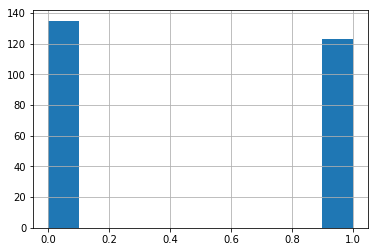

In [0]:
dems['Religious-groups-in-schools'].hist();


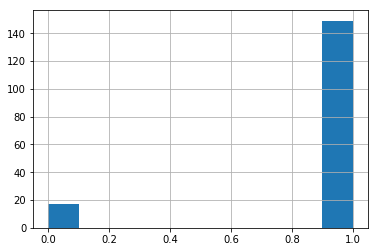

In [0]:
reps['Religious-groups-in-schools'].hist();

In [0]:
from scipy import stats
party_stats = np.random.binomial(n=1, p=.80, size=500)
confidence_interval(party_stats, confidence=0.85)

(0.792, 0.7658040501917621, 0.818195949808238)

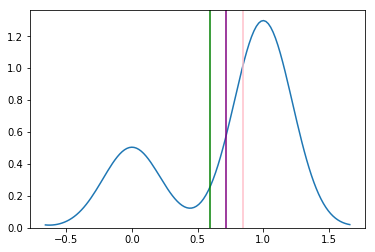

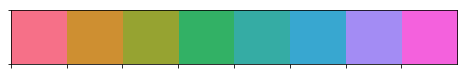

In [0]:
import seaborn as sns
party_stats = np.random.binomial(n=1, p=.8, size=50)
sns.kdeplot(party_stats)
CI = confidence_interval(party_stats)
plt.axvline(x=CI[1], color='green')
plt.axvline(x=CI[2], color='pink')
plt.axvline(x=CI[0], color='purple');
sns.palplot(sns.color_palette("husl", 8))

In [0]:
party_stats_mean = []
for x in range(0,100):
  party_stats = np.random.binomial(n=1, p=.8, size=30)
  party_stats_mean.append(party_stats_mean)

print(party_stats_mean)

[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]


In [0]:
# n = len(party_stats_mean)
# of = n-1
# mean = np.mean(party_stats_mean)
# sample_std = np.std(party_stats_mean, ddof=1)
# std_err = sample_std/n**.5

# CI = t.interval(.85, dof, loc=mean, scale=std_err)
# print("85% Confidence Interval: ", CI)

In [0]:
reps['Religious-groups-in-schools'].mean()

0.8975903614457831

In [0]:
reps['Religious-groups-in-schools'].value_counts()

1.0    149
0.0     17
Name: Religious-groups-in-schools, dtype: int64

In [0]:
dems['Religious-groups-in-schools'].mean()

0.47674418604651164

In [0]:
dems['Religious-groups-in-schools'].value_counts()

0.0    135
1.0    123
Name: Religious-groups-in-schools, dtype: int64

In [0]:
ttest_ind(dems['Religious-groups-in-schools'], reps['Religious-groups-in-schools'],
          nan_policy='omit')

Ttest_indResult(statistic=-9.737575825219457, pvalue=2.3936722520597287e-20)

# Summary of Findings
  *The data provided above is based on two political parties voting strides on the subject "Religious Groups in Schools". After going over the data, my Null Hypothesis is that Republicans would lean more towards "Religious-groups-in-schools". After plotting the average of both votes. The Republican Party statistics stated that the party was in favor. However the Democratic Vote was just as close. It was divided between yes and no. The yes vote was almost as high as the no. Referring to the Two sample TTEST, my Null Hypothesis was proven to have failed. Conslusively, the data presents that just as many Democrats voted yes as Republicans.*  

---



---



In [0]:
# Chi-squared tests
from scipy.stats import chisquare

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-10-09 00:50:37--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   912KB/s    in 25s     

2019-10-09 00:51:02 (899 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
loan_stats= pd.read_csv('LoanStats_2018Q4.csv', header=1)
print(loan_stats.shape)
loan_stats.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128414, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1.0,Jun-1979,2.0,15.0,NaN,6.0,0.0,15048.0,73%,22.0,w,15777.74,15777.74,6104.740000,6104.74,...,50.0,0.0,0.0,61699.0,33157.0,20700.0,40999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000.0,25000.0,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0.0,Sep-2003,0.0,NaN,NaN,7.0,0.0,8901.0,36.8%,21.0,w,0.00,0.00,26653.167580,26653.17,...,33.3,0.0,0.0,73683.0,49524.0,18600.0,49483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500.0,26500.0,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0.0,Dec-2006,2.0,NaN,NaN,17.0,0.0,43640.0,65.4%,37.0,w,23410.70,23410.70,5197.540000,5197.54,...,66.7,0.0,0.0,430403.0,107975.0,49300.0,88875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400.0,10400.0,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0.0,Jul-2013,2.0,32.0,67.0,8.0,1.0,1669.0,9.8%,10.0,w,8164.57,8164.57,3141.630000,3141.63,...,0.0,1.0,0.0,60709.0,39564.0,17000.0,43709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000.0,35000.0,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0.0,Sep-1985,0.0,77.0,NaN,13.0,0.0,55944.0,74.9%,39.0,w,0.00,0.00,36266.741552,36266.74,...,66.7,0.0,0.0,516204.0,82514.0,59700.0,51904.0,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
loan_stats.describe(exclude='number')

,id,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,2,128412,128412,128412,128412,107465,116708,128412,128412,128412,128412,128412,128412,128412,128412,128412,128412,128256,128412,128253,109769,128411,128412,14848,16782,128412,69,69,69,69,69,69,69,128412,168,168,168
unique,2,2,46,7,35,43892,11,4,3,3,7,2,12,12,880,50,644,1074,2,13,3,13,2,3,573,2,1,7,3,4,6,4,4,2,7,3,8
top,Total amount funded in policy code 1: 2050909275,36 months,13.56%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Aug-2006,0%,w,Sep-2019,Oct-2019,Sep-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,Sep-2019,Nov-2019,Sep-2019,Late (16-30 days),N,Sep-2019,ACTIVE,Aug-2019
freq,1,88179,6974,38011,9770,2090,38826,63490,58350,46305,105925,128367,70603,70603,1370,17879,1130,1132,114498,106772,109708,116568,111630,6360,155,128346,69,23,66,42,30,31,30,128244,59,152,57


In [0]:
kedetab=pd.crosstab(loan_stats['term'],loan_stats['grade'])
kedetab

grade,A,B,C,D,E,F,G
term,,,,,,,
36 months,33326,23460,18667,8994,3569,113,50
60 months,4685,12401,12351,8078,2393,274,51


In [0]:
kedtab_1= kedetab.iloc[0].values
kedtab_1

array([33326, 23460, 18667,  8994,  3569,   113,    50])

In [0]:
kedtab_2= kedetab.iloc[1].values
kedtab_2

array([ 4685, 12401, 12351,  8078,  2393,   274,    51])

In [0]:
contingency_table=pd.crosstab(loan_stats['term'], loan_stats['grade'], margins= True)
contingency_table

grade,A,B,C,D,E,F,G,All
term,,,,,,,,
36 months,33326,23460,18667,8994,3569,113,50,88179
60 months,4685,12401,12351,8078,2393,274,51,40233
All,38011,35861,31018,17072,5962,387,101,128412


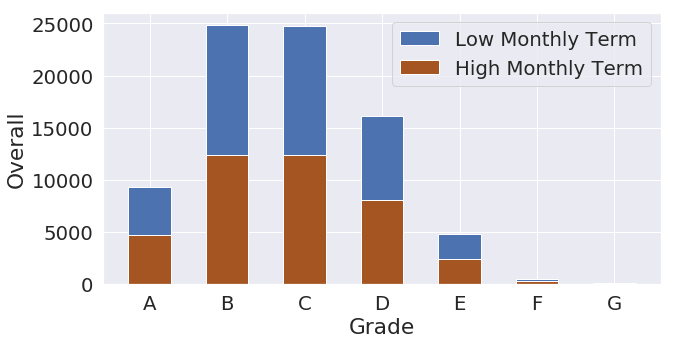

In [0]:
fig= plt.figure(figsize=(10,5))
sns.set(font_scale=1.8)
categories= ["A","B","C","D","E","F","G"]
p1= plt.bar(categories,kedtab_1,0.55, color='#a55522')
p2= plt.bar(categories,kedtab_2,0.55,bottom=kedtab_1)
plt.legend((p2[0], p1[0]), ('Low Monthly Term','High Monthly Term'))
plt.xlabel('Grade')
plt.ylabel('Overall')
plt.show()

In [0]:
row_sums= contingency_table.iloc[0].values
col_sums= contingency_table.iloc[1].values

print(row_sums)
print(col_sums)

[33326 23460 18667  8994  3569   113    50 88179]
[ 4685 12401 12351  8078  2393   274    51 40233]


In [0]:
total_cal= contingency_table.loc['All','All']
total_cal

128412

In [0]:
expected= []
for i in range(len(row_sums)):
  expected_row= []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_cal
    expected_row.append(expected_val)
    expected.append(expected_row)

expected= np.array(expected)
print(expected.shape)
print(expected)

(64, 8)
[[1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.04414304e+04]
 [1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.04414304e+04]
 [1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.04414304e+04]
 [1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.04414304e+04]
 [1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.04414304e+04]
 [1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.04414304e+04]
 [1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.04414304e+04]
 [1.21587009e+03 3.21835752e+03 3.20538132e+03 2.09643513e+03
  6.21041009e+02 7.11095848e+01 1.32357256e+01 1.044143

In [0]:
observed = pd.crosstab(loan_stats['term'], loan_stats['grade']).values
print(observed.shape)
observed

(2, 7)


array([[33326, 23460, 18667,  8994,  3569,   113,    50],
       [ 4685, 12401, 12351,  8078,  2393,   274,    51]])

In [0]:
chi_squared= ((observed - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

ValueError: ignored

In [0]:
dof= (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 49


In [0]:
#Using Scipy
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

Chi-Squared: 10136.644588649615
P-value: 0.0
Degrees of Freedom: 6
Expected: 
 [[26101.70364919 24625.32410522 21299.69334642 11723.14026726
   4094.03480983   265.74831791    69.35550416]
 [11909.29635081 11235.67589478  9718.30665358  5348.85973274
   1867.96519017   121.25168209    31.64449584]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)